### Preliminary 

In [1]:
import sys
sys.path.append("utils/")

from Verification_Data_func import *

### Direct

#### Direct Demo

In [2]:
# demo cot 4-shot ICL GSM8K testset Q10 
# print the prompt and generated answer
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, True, 3, True)
print('\n'.join(test_prompt.split('\n\n')[-2:]))
print("-----------------------------------------------------")
generate_text = Davinci_openai_short(test_prompt)
print(generate_text['choices'][0]["text"])
print("-----------------------------------------------------")

Question: Mr. Jesiah is a dairy cow farmer with cows producing 200 gallons of milk every day. The expenses for maintenance of the dairy farm and purchase of feeds is $3000 per month. Calculate his total income in June if he sells 1 gallon of milk at $3.55. 
Answer: The answer is ###{18300}
Question: Eliza's rate per hour for the first 40 hours she works each week is $10. She also receives an overtime pay of 1.2 times her regular hourly rate. If Eliza worked for 45 hours this week, how much are her earnings for this week? 
Answer:  

-----------------------------------------------------

The answer is ###{475}
-----------------------------------------------------


#### Mutltest on Single Question Direct

In [2]:
# demo direct 4-shot ICL GSM8K testset Q10 load the data
# we sample 30 times on GSM8K testset Q10 to plot the distribution of output answer

i = 9
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][i], GSM8K_train_df_reason, True, 3, True)

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_direct_Q10_30r_4shot.pkl'):
    n_round = 30
    pbar = tqdm(total=n_round)
    dic_result = {}
    count = 0 
    while count < n_round:
        generate_text = Davinci_openai_short(test_prompt)
        token_list = generate_text["choices"][0]["logprobs"]["tokens"]
        if ('{' in token_list)|(' {' in token_list):
            dic_result[count] = generate_text
            count += 1    
            pbar.update(1)
    pbar.close()
    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_direct_Q10_30r_4shot.pkl', 'wb') as fp:
        pickle.dump(dic_result, fp)
        print('dictionary saved successfully to file')
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_direct_Q10_30r_4shot.pkl', 'rb') as fp:
        dic_result = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 30/30 [00:00<00:00, 565.92it/s]


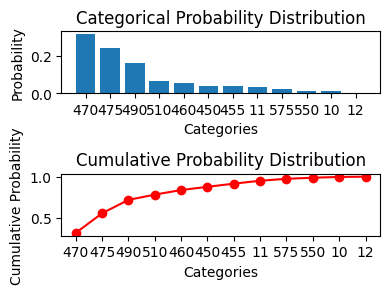

Entropy: 1.920083637658502


In [3]:
df_result_majority = single_test_processing(dic_result)
_ = single_test_plot(df_result_majority)

#### Large-Scale Experiment Direct

In [4]:
# direct 4-shot ICL GSM8K testset Q1:700 and load the data
# we sample 5 times each question to plot the distribution of output answer

Positive_Integer_index = []
for i in range(len(GSM8K_test_df)):
    Positive_Integer_index.append((GSM8K_test_df["answer_clean"][i][0] != "-") and ('.' not in GSM8K_test_df["answer_clean"][i]))

GSM8K_test_df_Pos_int = GSM8K_test_df[Positive_Integer_index].reset_index(drop=True)
GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[400:700,].reset_index(drop=True)

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_400to700_direct_5r.pkl'):
    n_round = 5
    n_shot = 4
    dic_result_collection = {}
    
    for i in tqdm(range(len(GSM8K_test_df_min))):
        count = 0
        dic_result = {}
        while count < n_round:
            prompt =  n_shot_prompt_generator_GSM8K_reason(n_shot,3,GSM8K_test_df_min["question"][i], GSM8K_train_df_reason, True, 3, True)
            generate_text = Davinci_openai_short(prompt)
            token_list = generate_text["choices"][0]["logprobs"]["tokens"]
            if ('{' in token_list)|(' {' in token_list):
                dic_result[count] = generate_text
                count += 1    
        dic_result_collection[i] = dic_result 

    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_400to700_direct_5r.pkl', 'wb') as fp:
        pickle.dump(dic_result_collection, fp)
        print('dictionary saved successfully to file')
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_400to700_direct_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 300/300 [00:03<00:00, 93.89it/s]
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/py

Accuracy: 12.67%
174
Accuracy: 17.24%
Entropy_True 0.7062597161709431
Entropy_False 1.3214787406400201


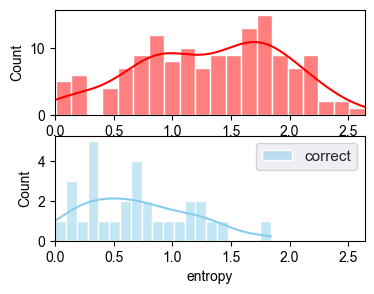

In [5]:
df_Q_summary = large_scale_data_processing(dic_result_collection,GSM8K_test_df_min)
summary_processing_plot(df_Q_summary)

### COT

#### COT Demo

In [7]:
# demo COT 4-shot ICL GSM8K testset Q10
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, False, 3, True)
print('\n'.join(test_prompt.split('\n\n')[-2:]))
print("-----------------------------------------------------")
generate_text = Davinci_openai_long(test_prompt)
print(generate_text['choices'][0]["text"])
print("-----------------------------------------------------")

Question: Anna goes trick-or-treating in a subdivision where she gets 14 pieces of candy per house. Her brother Billy goes trick-or-tricking in a neighboring subdivision where he gets 11 pieces of candy per house. If the first subdivision has 60 houses and the second subdivision has 75 houses, how many more pieces of candy does Anna get? 
Answer: 
Step 1  First find the total number of pieces of candy Anna gets: 14 pieces/house * 60 houses = 840 pieces
Step 2  Then find the total number of pieces of candy Billy gets: 11 pieces/house * 75 houses = <<11*75=825>>825 pieces
Step 3  Then subtract the number of pieces Billy gets from the number Anna gets to find the difference: 840 pieces - 825 pieces = <<840-825=15>>15 pieces
The answer is ###{15} 
Question: Eliza's rate per hour for the first 40 hours she works each week is $10. She also receives an overtime pay of 1.2 times her regular hourly rate. If Eliza worked for 45 hours this week, how much are her earnings for this week?
Answer: 
-

#### Multitest on Single Quesrtion COT

In [8]:
# demo COT 4-shot ICL GSM8K testset Q10 load the data
# we sample 30 times on GSM8K testset Q10 to plot the distribution of output answer

i = 9 
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][i], GSM8K_train_df_reason, False, 3, True)
def Davinci_openai(prompt):
    response = openai.Completion.create(
    model="text-davinci-003", prompt = prompt, temperature= 1,
    max_tokens=2048, top_p=1, frequency_penalty=0,
    presence_penalty=0, logprobs = 5)
    return response

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_cot_Q10_30r_4shot.pkl'):
    n_round = 30
    pbar = tqdm(total=n_round)
    dic_result = {}
    count = 0 
    while count < n_round:
        generate_text = Davinci_openai(test_prompt)
        token_list = generate_text["choices"][0]["logprobs"]["tokens"]
        index1 = 0
        index2 = 100 
        if '{' in  token_list:
            index1 = token_list.index('{')
        elif ' {' in  token_list:
            index1 = token_list.index(' {')
        if '}' in  token_list:
            index2 = token_list.index('}')
        elif '} ' in  token_list:
            index2 = token_list.index('} ')      
        if index2 - index1 == 2:
            dic_result[count] = generate_text
            count += 1    
            pbar.update(1)
    pbar.close()
    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_cot_Q10_30r_4shot.pkl', 'wb') as fp:
        pickle.dump(dic_result, fp)
        print('dictionary saved successfully to file')
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_cot_Q10_30r_4shot.pkl', 'rb') as fp:
        dic_result = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 30/30 [00:00<00:00, 534.58it/s]


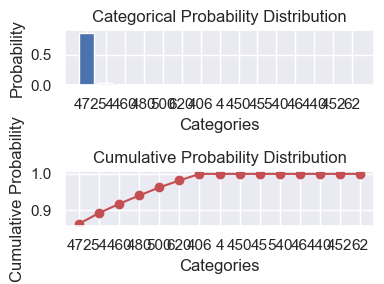

Entropy: 0.6420216673863085


In [9]:
df_result_majority = single_test_processing(dic_result)
_ = single_test_plot(df_result_majority)

#### Large-Scale Experiment COT

In [11]:
# COT 4-shot ICL  GSM8K testset Q1:200 load the data
# we sample 5 times each question to plot the distribution of output answer

Positive_Integer_index = []
for i in range(len(GSM8K_test_df)):
    Positive_Integer_index.append((GSM8K_test_df["answer_clean"][i][0] != "-") and ('.' not in GSM8K_test_df["answer_clean"][i]))

GSM8K_test_df_Pos_int = GSM8K_test_df[Positive_Integer_index].reset_index(drop=True)
GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[0:100,].reset_index(drop=True)

def Davinci_openai(prompt):
    response = openai.Completion.create(
    model="text-davinci-002", prompt = prompt, temperature= 1,
    max_tokens=2048, top_p=1, frequency_penalty=0,
    presence_penalty=0, logprobs = 5)
    return response

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_0to100_cot_5r.pkl'):
    dic_result_collection = {}
    n_round = 5
    n_shot = 4
    dic_result_collection = {}
    for i in tqdm(range(len(GSM8K_test_df_min))):
        Q_i = GSM8K_test_df_min["question"][i]
        count = 0
        dic_result = {}
        while count < n_round:
            prompt =  n_shot_prompt_generator_GSM8K_reason(n_shot,3,Q_i, GSM8K_train_df_reason, False, 3, True)
            generate_text = Davinci_openai(prompt)
            token_list = generate_text["choices"][0]["logprobs"]["tokens"]
            if ('{' in token_list)|(' {' in token_list):
                dic_result[count] = generate_text
                count += 1    
        dic_result_collection[i] = dic_result 

    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_0to100_cot_5r.pkl', 'wb') as fp:
        pickle.dump(dic_result_collection, fp)
        print('dictionary saved successfully to file')
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_0to100_cot_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 100/100 [00:01<00:00, 81.41it/s]
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/py

Accuracy: 43.0%
48
Accuracy: 58.33%
Entropy_True 0.34480762537796456
Entropy_False 0.7780697804587244


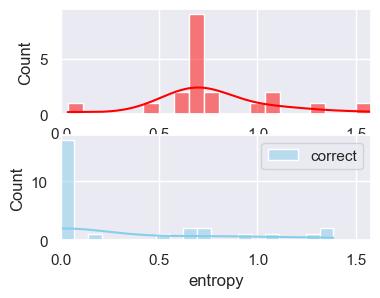

In [13]:
df_Q_summary = large_scale_data_processing(dic_result_collection, GSM8K_test_df_min)
summary_processing_plot(df_Q_summary)

### Step Setting

load dictionary 0-100
load dictionary 100-300
load dictionary 300-400


100%|██████████| 700/700 [00:00<00:00, 18093.83it/s]

Validation Percetage: 94.97%
Validation 2-step Percetage: 23.74%
Validation 3-step Percetage: 45.8%
Validation 4-step Percetage: 17.46%
Validation 5-step Percetage: 5.54%
Validation 2-step Percetage at least 2: 18.43%
Validation 3-step Percetage at least 2: 43.0%
Validation 4-step Percetage at least 2: 9.43%



/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


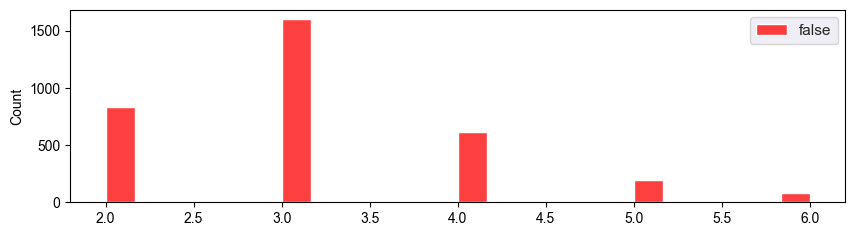

In [2]:
# loading
n_round= 5 

# Read dictionary pkl file
with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_0to100_cot_5r.pkl', 'rb') as fp:
    dic_result_collection1 = pickle.load(fp)
    print('load dictionary 0-100')

# Read dictionary pkl file
with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_100to400_cot_5r.pkl', 'rb') as fp:
    dic_result_collection2 = pickle.load(fp)
    print('load dictionary 100-300')

# Read dictionary pkl file
with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_400to700_cot_5r.pkl', 'rb') as fp:
    dic_result_collection3 = pickle.load(fp)
    print('load dictionary 300-400')

dic_result_collection = {}

count = 0 
milestone_list = [100, 400, 700]

while count < 700:
    if count < milestone_list[0]:
        dic_result_collection[count] = dic_result_collection1[count]
    elif count < milestone_list[1]:
        dic_result_collection[count] = dic_result_collection2[count-milestone_list[0]]
    elif count < milestone_list[2]:
        dic_result_collection[count] = dic_result_collection3[count-milestone_list[1]]
    count += 1 

step_num_matrix = np.zeros((len(list(dic_result_collection.keys())) ,n_round))

for i in tqdm(range(len(list(dic_result_collection.keys())))):
    dic_result_i = dic_result_collection[i]

    for j in range(n_round):
        result_i = dic_result_i[j]
        step_list = np.array(result_i["choices"][0]["text"].split('\n'))
        step_list = list(step_list[[len(i) > 5 for i in step_list]])[:-1]
        step_num_matrix[i,j] = len(step_list)
        dic_result_collection[i][j]["step_num"] = len(step_list)
        dic_result_collection[i][j]["reason_step"] = step_list

step_num_array = step_num_matrix.flatten()
step_num_array = step_num_array[step_num_array < 7]
step_num_array = step_num_array[step_num_array > 1]

dic_result_collection_copy = dic_result_collection.copy()

print("Validation Percetage: " + str(np.round(len(step_num_array)/len(list(dic_result_collection.keys()))/n_round * 100, 2) )+ "%" )

print("Validation 2-step Percetage: " + str(np.round(np.sum([i == 2 for i in step_num_array])/len(list(dic_result_collection.keys()))/n_round * 100, 2) )+ "%" )

print("Validation 3-step Percetage: " + str(np.round(np.sum([i == 3 for i in step_num_array])/len(list(dic_result_collection.keys()))/n_round * 100, 2) )+ "%" )

print("Validation 4-step Percetage: " + str(np.round(np.sum([i == 4 for i in step_num_array])/len(list(dic_result_collection.keys()))/n_round * 100, 2) )+ "%" )

print("Validation 5-step Percetage: " + str(np.round(np.sum([i == 5 for i in step_num_array])/len(list(dic_result_collection.keys()))/n_round * 100, 2) )+ "%" )


print("Validation 2-step Percetage at least 2: "  + str(np.round(np.sum(np.sum(step_num_matrix == 2 , axis = 1) > 2)/len(list(dic_result_collection.keys())) * 100,2)) + "%")
print("Validation 3-step Percetage at least 2: "  + str(np.round(np.sum(np.sum(step_num_matrix == 3 , axis = 1) > 2)/len(list(dic_result_collection.keys())) * 100,2)) + "%")
print("Validation 4-step Percetage at least 2: "  + str(np.round(np.sum(np.sum(step_num_matrix == 4 , axis = 1) > 2)/len(list(dic_result_collection.keys())) * 100,2)) + "%")

# plot
fig, axs = plt.subplots(1, 1, figsize=(10, 2.5))
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(x=step_num_array, color="red", label="false")
plt.legend() 
plt.show()

### 3Step1

#### Step-Wise 3-Step First Step Demo

In [16]:
# demo 3-Step First Step 4-shot ICL GSM8K testset Q10
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, False, 1, True)
i = 9 
j = 0 
test_prompt_step1 = test_prompt + '\n' +dic_result_collection_copy[i][j]["reason_step"][0]
print('\n'.join(test_prompt_step1.split('\n\n')[-2:]))
# print(test_prompt_step1)
print("-----------------------------------------------------")
generate_text = Davinci_openai_short(test_prompt_step1)
print(generate_text['choices'][0]["text"])
print("-----------------------------------------------------")

Question: A garden produced 237 potatoes, 60 fewer cucumbers and twice as many peppers than the cucumbers. How many vegetables did the garden produce? 
Answer: 
Step 1  The garden produced 237 potatoes - 60 = <<237-60=177>>177 cucumbers.
The answer is ###{768} 
Question: Eliza's rate per hour for the first 40 hours she works each week is $10. She also receives an overtime pay of 1.2 times her regular hourly rate. If Eliza worked for 45 hours this week, how much are her earnings for this week?
Answer: 
Step 1  Overtime kicks in after 40 hours, so Eliza worked for 5 hours of overtime.
-----------------------------------------------------

The answer is ###{460}
-----------------------------------------------------


#### Multi-test Step-Wise 3-Step First Step 

In [17]:
# demo COT 4-shot ICL GSM8K testset Q10 load the data
# we sample 30 times on GSM8K testset Q10 to plot the distribution of output answer

i = 9 
j = 0
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, False, 1, True)
test_prompt_step1 = test_prompt + '\n' +dic_result_collection_copy[i][j]["reason_step"][0]

def Davinci_openai(prompt):
    response = openai.Completion.create(
    model="text-davinci-002", prompt = prompt, temperature= 1,
    max_tokens=32, top_p=1, frequency_penalty=0,
    presence_penalty=0, logprobs = 5)
    return response

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step1_Q10_30r_4shot.pkl'):
    n_round = 30
    pbar = tqdm(total=n_round)
    dic_result = {}
    count = 0 
    while count < n_round:
        generate_text = Davinci_openai(test_prompt_step1)

        token_list = generate_text["choices"][0]["logprobs"]["tokens"]
        if ('{' in token_list)|(' {' in token_list):
            dic_result[count] = generate_text
            count += 1    
            pbar.update(1)
        else:
            print(generate_text["choices"][0]['text'])
            print("error")
    pbar.close()
    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step1_Q10_30r_4shot.pkl', 'wb') as fp:
        pickle.dump(dic_result, fp)
        print('dictionary saved successfully to file')
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step1_Q10_30r_4shot.pkl', 'rb') as fp:
        dic_result = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 30/30 [00:00<00:00, 555.66it/s]


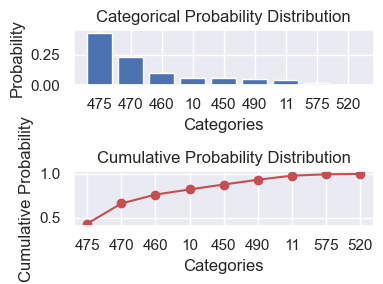

Entropy: 1.653383578922698


In [18]:
df_result_majority = single_test_processing(dic_result)
_ = single_test_plot(df_result_majority)

#### Large-Scale Experiment 3Step1

In [3]:
# COT 4-shot ICL  GSM8K testset Q1:200 load the data
# we sample 5 times each question to plot the distribution of output answer
# loading
n_round= 5 

step_3_index_list = np.arange(0,len(list(dic_result_collection_copy.keys())))[np.sum(step_num_matrix == 3 , axis = 1) > 2]


index_matrix = step_num_matrix == 3

Positive_Integer_index = []
for i in range(len(GSM8K_test_df)):
    Positive_Integer_index.append((GSM8K_test_df["answer_clean"][i][0] != "-") and ('.' not in GSM8K_test_df["answer_clean"][i]))

GSM8K_test_df_Pos_int = GSM8K_test_df[Positive_Integer_index].reset_index(drop=True)
GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[0:700,].reset_index(drop=True)

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step1_5r.pkl'):
    dic_result_collection = {}
    n_round = 5
    n_shot = 4
    dic_result_collection = {}
    pbar = tqdm(total=len(step_3_index_list))
    for i, index in enumerate(step_3_index_list):
        Q_i = GSM8K_test_df_min["question"][index]
        count = 0
        dic_result = {}
        tmp = np.sum(index_matrix[index, ])

        valid_index = np.arange(0,5)[index_matrix[index, ]]
        while count < n_round:
            prompt =   n_shot_prompt_generator_GSM8K_reason(4,3, Q_i, GSM8K_train_df_reason, False, 1, True)
            j = count % tmp
            prompt = prompt + '\n' + dic_result_collection_copy[index][valid_index[j]]["reason_step"][0]
            generate_text = Davinci_openai_short(prompt)
            token_list = generate_text["choices"][0]["logprobs"]["tokens"]
            if ('{' in token_list)|(' {' in token_list):
                dic_result[count] = generate_text
            count += 1    
        dic_result_collection[index] = dic_result 
        pbar.update(1)

    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step1_5r.pkl', 'wb') as fp:
        pickle.dump(dic_result_collection, fp)
        print('dictionary saved successfully to file')

    pbar.close()
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step1_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

with open('inference/result/info_entropy_dacinci_GSM8K/step_3_index_list.pkl', "wb") as fp:   #Pickling
    pickle.dump(step_3_index_list, fp)
with open('inference/result/info_entropy_dacinci_GSM8K/step_3_index_list.pkl', "rb") as fp:   # Unpickling
    step_3_index_list = pickle.load(fp)

load dictionary


100%|██████████| 301/301 [00:03<00:00, 86.02it/s]
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/py

Accuracy: 25.25%
150
Accuracy: 28.0%
Entropy_True 0.8608881391789615
Entropy_False 1.557807609628


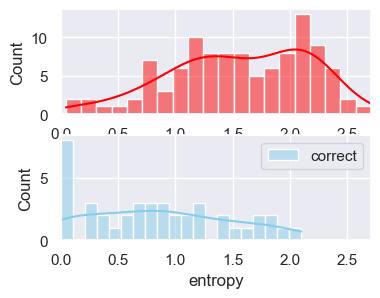

In [4]:
df_Q_summary = large_scale_data_processing_step(dic_result_collection, GSM8K_test_df_min, step_3_index_list)
summary_processing_plot(df_Q_summary)

### 3Step2

#### Step-Wise 3-Step Second Step Demo

In [5]:
# demo 3-Step First Step 4-shot ICL GSM8K testset Q10
i = 9
j = 0
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, False, 2, True)

test_prompt_step1 = test_prompt + '\n' +dic_result_collection_copy[i][j]["reason_step"][0]
test_prompt_step2 = test_prompt_step1 + '\n' +dic_result_collection_copy[i][j]["reason_step"][1] + '\nThe answer is' 

print('\n'.join(test_prompt_step2.split('\n\n')[-2:]))
# print(test_prompt_step1)
print("-----------------------------------------------------")
generate_text = Davinci_openai_short(test_prompt_step2)
print(generate_text['choices'][0]["text"])
print("-----------------------------------------------------")

Question: A town has ten neighborhoods, each having four roads passing through them. Each of the roads has 250 street lights on each opposite side. Calculate the total number of street lights on all the roads of the neighborhoods in the town. 
Answer: 
Step 1  If Each of the roads has 250 street lights on each opposite side, the total number of street lights on one road is 250*2 = <<250*2=500>>500
Step 2  Since each neighborhood has four roads passing through it, the total number of street lights in one neighborhood is 500*4 = <<500*4=2000>>2000 street lights.
The answer is ###{20000} 
Question: Eliza's rate per hour for the first 40 hours she works each week is $10. She also receives an overtime pay of 1.2 times her regular hourly rate. If Eliza worked for 45 hours this week, how much are her earnings for this week?
Answer: 
Step 1  Overtime kicks in after 40 hours, so Eliza worked for 5 hours of overtime.
Step 2  For the first 40 hours, she earned $10 * 40 = $<<10*40=400>>400.
The an

In [6]:
# demo COT 4-shot ICL GSM8K testset Q10 load the data
# we sample 30 times on GSM8K testset Q10 to plot the distribution of output answer

i = 9 
j = 0
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, False, 2, True)
test_prompt_step1 = test_prompt + '\n' +dic_result_collection_copy[i][j]["reason_step"][0]
test_prompt_step2 = test_prompt_step1 + '\n' +dic_result_collection_copy[i][j]["reason_step"][1] + '\nThe answer is'

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step2_Q10_30r_4shot.pkl'):
    n_round = 30
    pbar = tqdm(total=n_round)
    dic_result = {}
    count = 0 
    while count < n_round:
        generate_text = Davinci_openai_short(test_prompt_step2)

        token_list = generate_text["choices"][0]["logprobs"]["tokens"]
        if ('{' in token_list)|(' {' in token_list):
            dic_result[count] = generate_text
            count += 1    
            pbar.update(1)
        else:
            print(generate_text["choices"][0]['text'])
            print("error")
    pbar.close()
    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step2_Q10_30r_4shot.pkl', 'wb') as fp:
        pickle.dump(dic_result, fp)
        print('dictionary saved successfully to file')
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step2_Q10_30r_4shot.pkl', 'rb') as fp:
        dic_result = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 30/30 [00:00<00:00, 613.65it/s]


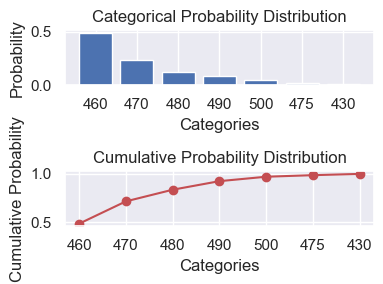

Entropy: 1.4221356945914747


In [8]:
df_result_majority = single_test_processing(dic_result)
_ = single_test_plot(df_result_majority)

#### Large-Scale Experiment 3Step2

In [39]:
# COT 4-shot ICL  GSM8K testset Q1:200 load the data
# we sample 5 times each question to plot the distribution of output answer
# loading
n_round= 5 

step_3_index_list = np.arange(0,len(list(dic_result_collection_copy.keys())))[np.sum(step_num_matrix == 3 , axis = 1) > 2]

index_matrix = step_num_matrix == 3

Positive_Integer_index = []
for i in range(len(GSM8K_test_df)):
    Positive_Integer_index.append((GSM8K_test_df["answer_clean"][i][0] != "-") and ('.' not in GSM8K_test_df["answer_clean"][i]))

GSM8K_test_df_Pos_int = GSM8K_test_df[Positive_Integer_index].reset_index(drop=True)
GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[0:700,].reset_index(drop=True)

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step2_5r.pkl'):
    dic_result_collection = {}
    n_round = 5
    n_shot = 4
    dic_result_collection = {}
    pbar = tqdm(total=len(step_3_index_list))
    for i, index in enumerate(step_3_index_list):
        Q_i = GSM8K_test_df_min["question"][index]
        count = 0
        dic_result = {}
        tmp = np.sum(index_matrix[index, ])

        valid_index = np.arange(0,5)[index_matrix[index, ]]
        while count < n_round:
            prompt =   n_shot_prompt_generator_GSM8K_reason(4,3, Q_i, GSM8K_train_df_reason, False, 2, True)
            j = count % tmp
            prompt = prompt + '\n' + dic_result_collection_copy[index][valid_index[j]]["reason_step"][0]
            prompt = prompt + '\n' + dic_result_collection_copy[index][valid_index[j]]["reason_step"][1] + '\nThe answer is' 
            generate_text = Davinci_openai_short(prompt)
            token_list = generate_text["choices"][0]["logprobs"]["tokens"]
            if ('{' in token_list)|(' {' in token_list):
                dic_result[count] = generate_text
                count += 1    
        dic_result_collection[index] = dic_result 
        pbar.update(1)

    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step2_5r.pkl', 'wb') as fp:
        pickle.dump(dic_result_collection, fp)
        print('dictionary saved successfully to file')

    pbar.close()
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step2_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 301/301 [00:03<00:00, 84.19it/s]
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/py

Accuracy: 39.53%
163
Accuracy: 49.69%
Entropy_True 0.4658965624582689
Entropy_False 1.13793432168067


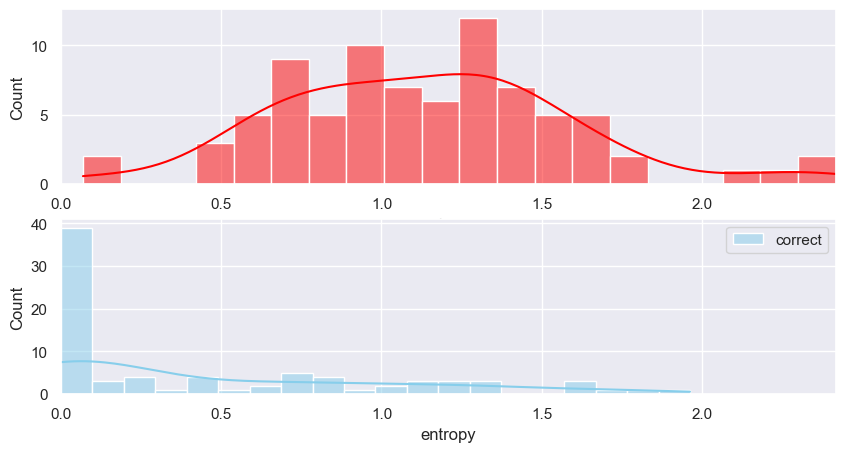

In [40]:
df_Q_summary = large_scale_data_processing_step(dic_result_collection)
summary_processing_plot(df_Q_summary)

### 3Step3

#### Step-Wise 3-Step Thrid Step Demo

In [10]:
# demo 3-Step First Step 4-shot ICL GSM8K testset Q10

i = 9
j = 0
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, False, 3, True)

test_prompt_step1 = test_prompt + '\n' +dic_result_collection_copy[i][j]["reason_step"][0]
test_prompt_step2 = test_prompt_step1 + '\n' +dic_result_collection_copy[i][j]["reason_step"][1] 
test_prompt_step3 = test_prompt_step2 + '\n' +dic_result_collection_copy[i][j]["reason_step"][2] + '\nThe answer is' 

print('\n'.join(test_prompt_step3.split('\n\n')[-2:]))
# print(test_prompt_step1)
print("-----------------------------------------------------")
generate_text = Davinci_openai_short(test_prompt_step3)
print(generate_text['choices'][0]["text"])
print("-----------------------------------------------------")

Question: Lizzy had $30. She loaned out $15 to her friend. How much will Lizzy have if her friend returned the money with an interest of 20%? 
Answer: 
Step 1  Initially, Lizzy had $30; she loaned out $15 so she has $30-$15 = $<<30-15=15>>15 left
Step 2  Her friend is returning the $15 with 20% interest for a total of $15+($15*(20/100)) = $<<15+15*(20/100)=18>>18
Step 3  Lizzy will now have $15+$18 = $<<15+18=33>>33
The answer is ###{33} 
Question: Eliza's rate per hour for the first 40 hours she works each week is $10. She also receives an overtime pay of 1.2 times her regular hourly rate. If Eliza worked for 45 hours this week, how much are her earnings for this week?
Answer: 
Step 1  Overtime kicks in after 40 hours, so Eliza worked for 5 hours of overtime.
Step 2  For the first 40 hours, she earned $10 * 40 = $<<10*40=400>>400.
Step 3  For the 5 hours of overtime, she earned $12 * 5 = $<<12*5=60>>60.
The answer is
-----------------------------------------------------
 ###{460}
----

#### Multitest on Single Question 3Step3

In [11]:
# demo COT 4-shot ICL GSM8K testset Q10 load the data
# we sample 30 times on GSM8K testset Q10 to plot the distribution of output answer

i = 9 
j = 0
test_prompt = n_shot_prompt_generator_GSM8K_reason(4,3,GSM8K_test_df["question"][9], GSM8K_train_df_reason, False, 3, True)
test_prompt_step1 = test_prompt + '\n' +dic_result_collection_copy[i][j]["reason_step"][0]
test_prompt_step2 = test_prompt_step1 + '\n' +dic_result_collection_copy[i][j]["reason_step"][1]
test_prompt_step3 = test_prompt_step2 + '\n' +dic_result_collection_copy[i][j]["reason_step"][2] + '\nThe answer is'

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step3_Q10_30r_4shot.pkl'):
    n_round = 30
    pbar = tqdm(total=n_round)
    dic_result = {}
    count = 0 
    while count < n_round:
        generate_text = Davinci_openai_short(test_prompt_step3)

        token_list = generate_text["choices"][0]["logprobs"]["tokens"]
        if ('{' in token_list)|(' {' in token_list):
            dic_result[count] = generate_text
            count += 1    
            pbar.update(1)
        else:
            print(generate_text["choices"][0]['text'])
            print("error")
    pbar.close()
    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step3_Q10_30r_4shot.pkl', 'wb') as fp:
        pickle.dump(dic_result, fp)
        print('dictionary saved successfully to file')
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step3_Q10_30r_4shot.pkl', 'rb') as fp:
        dic_result = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 30/30 [00:00<00:00, 539.62it/s]


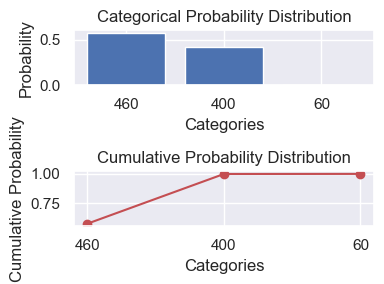

Entropy: 0.6865265916431912


0.6865265916431912

In [12]:
df_result_majority = single_test_processing(dic_result)
single_test_plot(df_result_majority)

#### Large-Scale Experiment 3Step3

In [13]:
# COT 4-shot ICL  GSM8K testset Q1:200 load the data
# we sample 5 times each question to plot the distribution of output answer
# loading
n_round= 5 

step_3_index_list = np.arange(0,len(list(dic_result_collection_copy.keys())))[np.sum(step_num_matrix == 3 , axis = 1) > 2]

index_matrix = step_num_matrix == 3

Positive_Integer_index = []
for i in range(len(GSM8K_test_df)):
    Positive_Integer_index.append((GSM8K_test_df["answer_clean"][i][0] != "-") and ('.' not in GSM8K_test_df["answer_clean"][i]))

GSM8K_test_df_Pos_int = GSM8K_test_df[Positive_Integer_index].reset_index(drop=True)
GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[0:700,].reset_index(drop=True)

if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step3_5r.pkl'):
    dic_result_collection = {}
    n_round = 5
    n_shot = 4
    dic_result_collection = {}
    pbar = tqdm(total=len(step_3_index_list))
    for i, index in enumerate(step_3_index_list):
        Q_i = GSM8K_test_df_min["question"][index]
        count = 0
        dic_result = {}
        tmp = np.sum(index_matrix[index, ])

        valid_index = np.arange(0,5)[index_matrix[index, ]]
        while count < n_round:
            prompt =   n_shot_prompt_generator_GSM8K_reason(4,3, Q_i, GSM8K_train_df_reason, False, 3, True)
            j = count % tmp
            prompt = prompt + '\n' + dic_result_collection_copy[index][valid_index[j]]["reason_step"][0]
            prompt = prompt + '\n' + dic_result_collection_copy[index][valid_index[j]]["reason_step"][1]
            prompt = prompt + '\n' + dic_result_collection_copy[index][valid_index[j]]["reason_step"][2] + '\nThe answer is' 
            generate_text = Davinci_openai_short(prompt)
            token_list = generate_text["choices"][0]["logprobs"]["tokens"]
            if ('{' in token_list)|(' {' in token_list):
                dic_result[count] = generate_text
                count += 1    
        dic_result_collection[index] = dic_result 
        pbar.update(1)

    # save dictionary to person_data.pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step3_5r.pkl', 'wb') as fp:
        pickle.dump(dic_result_collection, fp)
        print('dictionary saved successfully to file')

    pbar.close()
else:
    # Read dictionary pkl file
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step3_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

load dictionary


100%|██████████| 301/301 [00:03<00:00, 85.81it/s]
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/py

Accuracy: 37.54%
174
Accuracy: 50.57%
Entropy_True 0.2883087761646204
Entropy_False 0.851871037579143


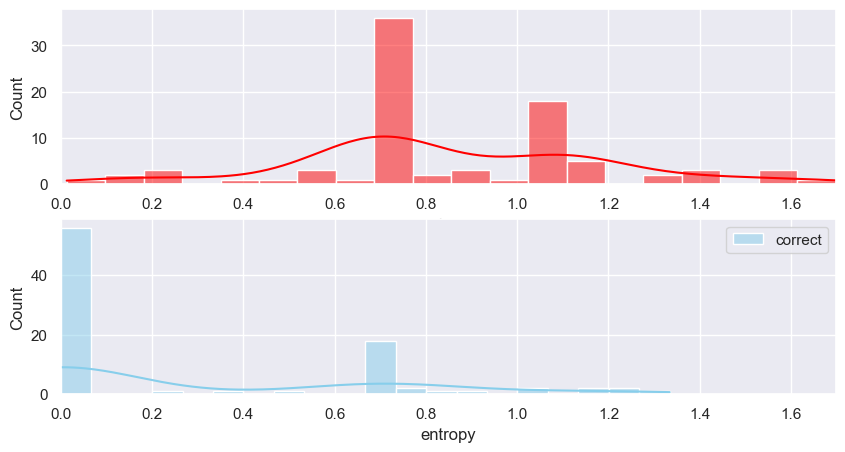

In [34]:
df_Q_summary = large_scale_data_processing_step(dic_result_collection)
summary_processing_plot(df_Q_summary)

#### 1324

In [3]:
# entropy_df_generation function
def entropy_df_generation(dic_result,n_round = 3):
    df = pd.DataFrame(columns=["token", 'logprob'])
    for i in range(n_round):
        result_i = dic_result[i]["choices"]
        if '{' in  result_i[0]["logprobs"]["tokens"]:
            index = result_i[0]["logprobs"]["tokens"].index('{')
        else:
            index = result_i[0]["logprobs"]["tokens"].index(' {')
        sample_token = result_i[0]["logprobs"]["tokens"][index+1]
        sample_token_logprob = result_i[0]["logprobs"]["token_logprobs"][index+1]
        df.loc[len(df)] = [sample_token, sample_token_logprob]  
        log_list = result_i[0]["logprobs"]["top_logprobs"][index+1]
        for key in list(log_list.keys()):
            df.loc[len(df)] = [key, log_list[key]]
    df_result = pd.DataFrame(columns=["token", 'logprob'])
    for token in np.unique(df["token"]):
        df_result.loc[len(df_result)] = [token, np.mean(df[df["token"] == token]["logprob"])]
    df_result["prob"] = np.exp(df_result["logprob"])
    df_result["prob"] = df_result["prob"]/np.sum(df_result["prob"])
    df_result["logprob"] = np.log(df_result["prob"])
    df_result = df_result.sort_values(by = "prob", ascending = False).reset_index(drop=True)
    df_result["cumprob"] = np.cumsum(df_result["prob"])
    df_result_majority = df_result[df_result["cumprob"] < 1] 
    df_result_majority = df_result_majority[[i.replace(' ','').isnumeric() for i in df_result_majority["token"]]].reset_index(drop=True)
    df_result_majority["prob"] = np.exp(df_result_majority["logprob"])
    df_result_majority["prob"] = df_result_majority["prob"]/np.sum(df_result_majority["prob"])
    df_result_majority["cumprob"] = np.cumsum(df_result_majority["prob"])
    return df_result_majority

# demo cot 4-shot ICL GSM8K testset Q10 
def Davinci_openai_stop(prompt, stop_index):
    response = openai.Completion.create(
    model="text-davinci-002",prompt = prompt, temperature = 1,
    max_tokens=1024, top_p=1, frequency_penalty=0,
    presence_penalty=0,logprobs = 5,
    stop = stop_index)
    return response

def Davinci_openai(prompt):
    response = openai.Completion.create(
    model="text-davinci-002",prompt = prompt, temperature = 1,
    max_tokens=32, top_p=1, frequency_penalty=0,
    presence_penalty=0,logprobs = 5)
    return response

def answer_diversity(ans_prompt,n_round = 3):
    count = 0 
    dic_result = {}
    while count < n_round:
        index_front  = -100
        index_end = 100 
        ans_generation = Davinci_openai(ans_prompt)
        if ("{" in ans_generation["choices"][0]["logprobs"]["tokens"]):
            index_front =  ans_generation["choices"][0]["logprobs"]["tokens"].index("{")
        if (" {" in ans_generation["choices"][0]["logprobs"]["tokens"]):
            index_front =  ans_generation["choices"][0]["logprobs"]["tokens"].index(" {")

        if ("}" in ans_generation["choices"][0]["logprobs"]["tokens"]):
            index_end =  ans_generation["choices"][0]["logprobs"]["tokens"].index("}")
        if ("} " in ans_generation["choices"][0]["logprobs"]["tokens"]):
            index_end =  ans_generation["choices"][0]["logprobs"]["tokens"].index("} ")
        
        if index_end - index_front == 2: 
            dic_result[count] = ans_generation
            count += 1 
    return dic_result

In [378]:
def entropy_check(i,step_reasoning_list, n_shot_num = 4, n_step_num = 3):

    # answer entropy check
    ans_prompt = n_shot_prompt_generator_GSM8K_reason(n_shot_num ,n_step_num ,GSM8K_test_df["question"][i], GSM8K_train_df_reason, False, len(step_reasoning_list), True) 

    for _ in step_reasoning_list:
        ans_prompt += '\n'
        ans_prompt += _["choices"][0]["text"]
    ans_prompt += "\nThe answer is"

    ## sample 
    dic_result = answer_diversity(ans_prompt)

    ## dataprocessing
    df_summary = entropy_df_generation(dic_result)

    ## entrpy check
    entropy_value = entropy(df_summary["prob"])
    print(entropy_value)
    return ans_prompt, dic_result, df_summary, entropy_value

from functools import reduce  # forward compatibility for Python 3
import operator

def getFromDict(dataDict, mapList):
    return reduce(operator.getitem, mapList, dataDict)

def setInDict(dataDict, mapList, value):
    getFromDict(dataDict, mapList[:-1])[mapList[-1]] = value

def belif_change_index(dist1, dist2):
    index = 0
    token_list = list(set(dist1["token"]) | set(dist2["token"]))
    for i in token_list:
        if (i in list(dist1["token"])) and (i in list(dist2["token"])):
            index1 = list(dist1["token"]).index(i)
            index2 = list(dist2["token"]).index(i)
            index += np.abs(dist1["prob"][index1] - dist2["prob"][index2])

        elif (i not in list(dist1["token"])) and (i in list(dist2["token"])):
            index2 = list(dist2["token"]).index(i)
            index += np.abs(dist2["prob"][index2])        
        else:
            index1 = list(dist1["token"]).index(i)
            index += np.abs(dist1["prob"][index1])     
    return(index)

In [379]:
def iteration(tmp_book,entropy_level = 1):
    layer_number = int(tmp_book["layer"].split("{")[1][0])
    step_str = "Step{"+str(layer_number+1) + "}Num"
    tmp = {}  
    tmp[step_str] = 0
    entropy_score = 10 
    # intial prompt 
    count = 0 
    print("In Step " + str(layer_number) + "\n")

    entropy_value = tmp_book["Status"][-1]
    dist1 = tmp_book["Status"][2]
    prompt = tmp_book["prompt"]
    step_reasoning = tmp_book["step_reasoning"]
    prompt += step_reasoning['choices'][0]["text"]

    while (entropy_score > entropy_level) &  (count < 2):
        step_reasoning_list = tmp_book["step_reasoning_list"].copy()
        print("-----------------------------------------------------") 
        step_reasoning = Davinci_openai_stop(prompt,["Step "+str(layer_number+2)])
        step_reasoning_list.append(step_reasoning)
        print('-------------------------------------------')
        for i in step_reasoning_list:
            print(i['choices'][0]["text"])
        print('-------------------------------------------')
        print(step_reasoning['choices'][0]["text"])   
        ans1 = entropy_check(question_index,step_reasoning_list , n_shot, n_step)
        dist2 = ans1[2]
        tmp[count] = {}
        tmp[count]["prompt"] = prompt
        tmp[count]["Status"] = ans1
        tmp[count]["step_reasoning"] = step_reasoning 
        tmp[count]["step_reasoning_list"] = step_reasoning_list
        tmp[step_str] += 1
        tmp[count]["layer"] = step_str
        tmp[count]["belif"] = belif_change_index(dist1, dist2)
        print("Change of Belif: " + str(tmp[count]["belif"]))
        count += 1
        print("In " + str(layer_number+1) +   " Step Generate: "+str(count))
        entropy_score = ans1[-1]
    return tmp

In [245]:
# demo 
n_round = 3
i = 9 
n_step = 3
n_shot = 4

step_reasoning_list = []
# print the prompt and generated answer
prompt = n_shot_prompt_generator_GSM8K_reason(n_shot,n_step,GSM8K_test_df["question"][i], GSM8K_train_df_reason, False, n_step, False)
print("-----------------------------------------------------")
# step 1 generation 
step_reasoning = Davinci_openai_stop(prompt,["Step 2"])
step_reasoning_list.append(step_reasoning)
print(step_reasoning['choices'][0]["text"])

ans1 = entropy_check(i,step_reasoning_list , n_shot, n_step)

# new next prompt 
prompt = prompt + step_reasoning["choices"][0]["text"]

# step 2
print("-----------------------------------------------------")
step_reasoning = Davinci_openai_stop(prompt,["Step 3"])
step_reasoning_list.append(step_reasoning)
print(step_reasoning['choices'][0]["text"])

ans2 = entropy_check(i,step_reasoning_list , n_shot, n_step)


# new next prompt
prompt = prompt + step_reasoning["choices"][0]["text"]

# step 3
print("-----------------------------------------------------")
step_reasoning = Davinci_openai_stop(prompt,["Step 4"])
step_reasoning_list.append(step_reasoning)
print(step_reasoning['choices'][0]["text"])

ans3 = entropy_check(i,step_reasoning_list , n_shot, n_step)

-----------------------------------------------------

Step 1  For the first 40 hours of the week, Eliza earned $10/hour * 40 hours = $400.

0.8490455155344361
-----------------------------------------------------
Step 2  She also earned 1.2 times her hourly rate for the 5 overtime hours she worked this week. So she earned 1.2 * $10/hour * 5 hours = $60 in overtime pay.

0.28152904474195906
-----------------------------------------------------
Step 3  Eliza's total earnings for the week are $400 + $60 = <<400+60=460>>460.
0.0007988795196558579


In [359]:
dist1

,token,logprob,prob,cumprob
0,460,-0.278237,0.757118,0.757118
1,480,-1.951450,0.142068,0.899186
2,490,-3.056183,0.047067,0.946253
3,520,-3.365613,0.034541,0.980793
4,560,-3.952503,0.019207,1.000000


In [371]:
belif_change_index(dist1, dist2)

33.47802477404505

In [381]:
layer_total = 3

n_round = 3
question_index = 9 
n_step = 3
n_shot = 4
tree_structure = {}

record_index_list = []
record_dic_total = {}
divide_list = []
index_dic = 0

for layer_index in range(layer_total):
    if layer_index == 0:
        tmp_list = []
        n_round = 3
        question_index = 9 
        n_step = 3
        n_shot = 4

        log_book = {}
        step_str = "Step{"+str(1) + "}Num"
        print(step_str)
        # print the prompt and generated answer
        log_book[step_str] = 0

        entropy_score = 5 
        # intial prompt 
        count = 0 
        while (entropy_score > 0.6) &  (count < 2):
            step_reasoning_list = []
            prompt = n_shot_prompt_generator_GSM8K_reason(n_shot,n_step,GSM8K_test_df["question"][question_index], GSM8K_train_df_reason, False, n_step, False)
            print("-----------------------------------------------------")
            # step 1 generation 
            step_reasoning = Davinci_openai_stop(prompt,["Step 2"])
            step_reasoning_list.append(step_reasoning)
            print(step_reasoning['choices'][0]["text"])
            
            ans1 = entropy_check(question_index,step_reasoning_list , n_shot, n_step)
            tree_structure[count] = {}
            log_book[count] = {}
            log_book[count]["prompt"] = prompt
            log_book[count]["Status"] = ans1
            log_book[count]["step_reasoning"] = step_reasoning 
            log_book[count]["step_reasoning_list"] = step_reasoning_list
            print('-------------------------------------------')
            for i in step_reasoning_list:
                print(i['choices'][0]["text"])
            print('-------------------------------------------')
            log_book[step_str] += 1
            log_book[count]["layer"] = step_str
            tmp_list.append(count)
            record_dic_total[index_dic] = log_book[count] 
            index_dic += 1
            count += 1
            print("In first Step Generate: "+str(count))
            entropy_score = ans1[-1]
        record_index_list.append(tmp_list)
    else:
        tmp_list = []
        tmp_list2 = []
        step_str = "Step{"+str(layer_index+1) + "}Num"
        print(step_str)
        for i in record_index_list[-1]:
            tmp_book_i = record_dic_total[i]
            ans = iteration(tmp_book_i, 0.001) 
            tmp_num = ans[step_str] 
            for j in range(tmp_num):
                record_dic_total[index_dic] = ans[j]
                tmp_list.append(index_dic)
                index_dic += 1 
            tmp_list2.append(index_dic)
        divide_list.append(tmp_list2)
        record_index_list.append(tmp_list) 
for i,j in enumerate(divide_list):
    divide_list[i] = [k - 1 for k in j]

adjusted_list = []

for i in range(layer_total):
    if i !=0 :
        sub_list = record_index_list[i].copy()
        sub_divide = divide_list[i-1].copy()
        tmp1 = []
        tmp = []
        for j in sub_list:
            if len(sub_divide) != 0:
                if j == sub_divide[0]:
                    sub_divide.remove(sub_divide[0])
                    tmp.append(j)
                    tmp1.append(tmp)
                    tmp = []
                else:
                    tmp.append(j)
            
        adjusted_list.append(tmp1)
    else:
        adjusted_list.append(record_index_list[i])

log_book_copy = log_book.copy()
for i in np.arange(len(adjusted_list)-1, -1, -1):
    if i == 0:
        break
        tmp_list = adjusted_list[i+1]
        step_str = "Step{"+str(i+1) + "}Num"
        for j, sub_list in enumerate(tmp_list):
            setInDict(log_book_copy, [j,"Next"], {})
            setInDict(log_book_copy, [j,"Next",step_str], len(sub_list))
            for k, dic in enumerate(sub_list):
                setInDict(log_book_copy, [j,"Next", k], record_dic_total[dic])
    elif i == 1: 
        step_str = "Step{"+str(i+1) + "}Num"
        for j, position_j in enumerate(record_index_list[i-1]):
            dic = record_dic_total[position_j]
            setInDict(dic, ["Next"], {})
            setInDict(dic, ["Next",step_str], len(sub_list))
            for k, position_k in enumerate(adjusted_list[i][j]):
                setInDict(dic, ["Next", k], record_dic_total[position_k])
            log_book_copy[position_j] = dic         
    else:
        step_str = "Step{"+str(i+1) + "}Num"
        for j, position_j in enumerate(record_index_list[i-1]):
            dic = record_dic_total[position_j]
            setInDict(dic, ["Next"], {})
            setInDict(dic, ["Next",step_str], len(sub_list))
            for k, position_k in enumerate(adjusted_list[i][j]):
                setInDict(dic, ["Next", k], record_dic_total[position_k])
            record_dic_total[position_j] = dic 

Step{1}Num
-----------------------------------------------------

Step 1  The regular rate is $10 per hour. The overtime rate is 1.2 times the regular rate, or $12 per hour.

0.8446261191130202
-------------------------------------------

Step 1  The regular rate is $10 per hour. The overtime rate is 1.2 times the regular rate, or $12 per hour.

-------------------------------------------
In first Step Generate: 1
-----------------------------------------------------

 Step 1 For the first 40 hours that Eliza works each week, she is paid $10 per hour, so for 40 hours, she would be paid $10*40=<<$10*40=$400>>$400.
 
0.9279058946487866
-------------------------------------------

 Step 1 For the first 40 hours that Eliza works each week, she is paid $10 per hour, so for 40 hours, she would be paid $10*40=<<$10*40=$400>>$400.
 
-------------------------------------------
In first Step Generate: 2
Step{2}Num
In Step 1

-----------------------------------------------------
-----------------